**Notes to YT-Video: https://www.youtube.com/watch?v=c0k-YLQGKjY**

In [1]:
# Nice imports
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13725435248592680278
xla_global_id: -1
]


In [2]:
model_name = "model_4"

In [3]:
git_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML'))
asset_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML-Assets'))

print("Path to git folder:", git_folder)
print("Path to asset folder:", asset_folder)


Path to git folder: c:\Users\erlih\repos\HeroysundBridge-ML
Path to asset folder: c:\Users\erlih\repos\HeroysundBridge-ML-Assets


In [4]:
df = pd.read_parquet(os.path.join(asset_folder, 'silver','combined_data_v01.parquet'))
df

,Hours_since_2019.12.31,Date,Point_1_N_mean,Point_2_N_mean,Point_3_N_mean,Point_4_S_mean,Point_5_S_mean,Point_6_S_mean,Omega_N_mean,Omega_S_mean,PT100_Temperature_mean,Average_Global_Radiation_(1h),Sunshine_Duration_(1h),Average_of_Mean_Wind_(1h),Precipitation_(1h),Relative_Humidity(1h)
0,5916,2020090212,18.324186,16.439996,12.273690,43.943916,41.496791,32.350760,-0.000391,-0.002391,16.261441,954.0,52.0,0.9,0.1,49.0
1,5940,2020090312,24.667922,24.155004,18.399311,58.603003,57.104418,46.496854,-0.000950,0.001639,16.858222,966.0,52.0,3.5,0.0,45.0
2,5962,2020090410,-15.535099,-21.302234,-17.400303,43.134141,39.866109,29.849380,0.004475,0.015130,14.256647,131.6,0.0,2.6,0.5,87.0
3,5966,2020090414,-10.819921,-15.643464,-12.470669,51.753103,50.788288,37.997157,0.001993,0.014450,14.687477,314.0,0.0,4.0,0.2,86.0
4,5970,2020090418,-15.399971,-18.856000,-14.976123,52.673533,51.309598,36.255848,0.005713,0.017729,13.874647,236.0,21.0,1.3,0.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26807,35082,2023123118,-20.227229,-104.882947,-99.809995,-277.179242,-317.856174,-257.119294,0.000000,-0.040876,-4.738139,-3.0,0.0,1.1,0.0,60.0
26808,35083,2023123119,-19.488729,-105.022363,-99.542072,-276.450669,-317.423938,-256.383557,0.000000,-0.040332,-4.625233,-3.0,0.0,1.3,0.0,59.0
26809,35084,2023123120,-21.503484,-107.888565,-100.934269,-278.409798,-319.099933,-258.295017,0.000000,-0.044919,-4.645648,-2.9,0.0,1.3,0.0,57.0
26810,35085,2023123121,-22.667015,-109.260424,-102.036887,-279.507222,-320.289949,-259.567834,0.000000,-0.048216,-4.756255,-2.9,0.0,1.3,0.0,56.0


**Making index (First column) set up in the correct way**

In [5]:
df = df.set_index('Hours_since_2019.12.31')
df

,Date,Point_1_N_mean,Point_2_N_mean,Point_3_N_mean,Point_4_S_mean,Point_5_S_mean,Point_6_S_mean,Omega_N_mean,Omega_S_mean,PT100_Temperature_mean,Average_Global_Radiation_(1h),Sunshine_Duration_(1h),Average_of_Mean_Wind_(1h),Precipitation_(1h),Relative_Humidity(1h)
Hours_since_2019.12.31,,,,,,,,,,,,,,,
5916,2020090212,18.324186,16.439996,12.273690,43.943916,41.496791,32.350760,-0.000391,-0.002391,16.261441,954.0,52.0,0.9,0.1,49.0
5940,2020090312,24.667922,24.155004,18.399311,58.603003,57.104418,46.496854,-0.000950,0.001639,16.858222,966.0,52.0,3.5,0.0,45.0
5962,2020090410,-15.535099,-21.302234,-17.400303,43.134141,39.866109,29.849380,0.004475,0.015130,14.256647,131.6,0.0,2.6,0.5,87.0
5966,2020090414,-10.819921,-15.643464,-12.470669,51.753103,50.788288,37.997157,0.001993,0.014450,14.687477,314.0,0.0,4.0,0.2,86.0
5970,2020090418,-15.399971,-18.856000,-14.976123,52.673533,51.309598,36.255848,0.005713,0.017729,13.874647,236.0,21.0,1.3,0.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35082,2023123118,-20.227229,-104.882947,-99.809995,-277.179242,-317.856174,-257.119294,0.000000,-0.040876,-4.738139,-3.0,0.0,1.1,0.0,60.0
35083,2023123119,-19.488729,-105.022363,-99.542072,-276.450669,-317.423938,-256.383557,0.000000,-0.040332,-4.625233,-3.0,0.0,1.3,0.0,59.0
35084,2023123120,-21.503484,-107.888565,-100.934269,-278.409798,-319.099933,-258.295017,0.000000,-0.044919,-4.645648,-2.9,0.0,1.3,0.0,57.0


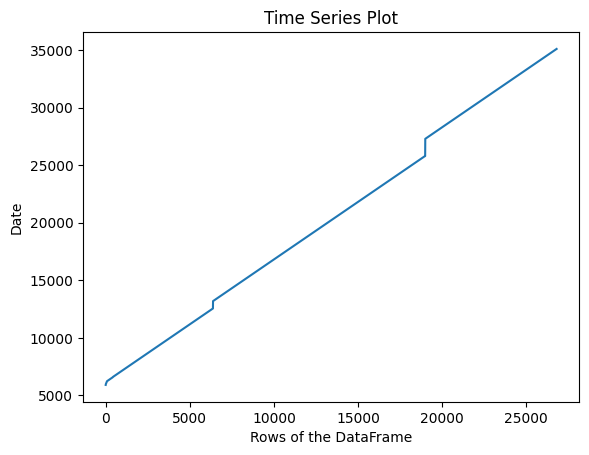

In [6]:
# Plot the time series
plt.plot(df.index)

# Add labels and title
plt.xlabel('Rows of the DataFrame')
plt.ylabel('Date')
plt.title('Time Series Plot')

# Show the plot
plt.show()

<Axes: xlabel='Hours_since_2019.12.31'>

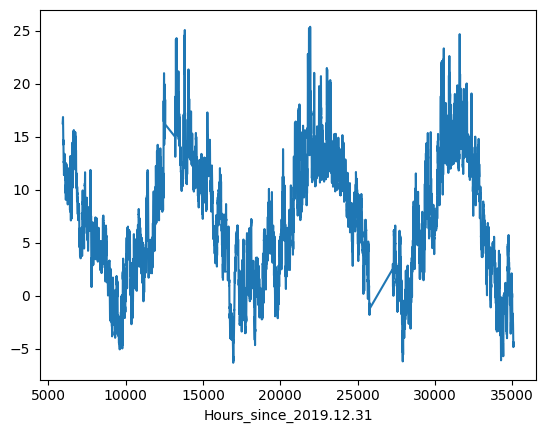

In [7]:
temp = df['PT100_Temperature_mean']
temp.plot()

In [8]:
 def df_to_X_y(df, window_size = 5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, window_size = WINDOW_SIZE)
X.shape, y.shape
print(y)

[13.37402974 13.06079475 12.57604904 ... -4.64564789 -4.75625481
 -4.43308486]


In [10]:
X_train, y_train = X[:20000], y[:20000]
X_valid, y_valid = X[20000:25000], y[20000:25000]
X_test, y_test = X[25000:], y[25000:]
X_train.shape, X_valid.shape, X_test.shape

((20000, 5, 1), (5000, 5, 1), (1807, 5, 1))

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((WINDOW_SIZE, 1)))
model.add(LSTM(64))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

# Assuming you want to use mean squared error as a metric
model.compile(optimizer=Adam(), loss=mean_squared_error, metrics=['mse'])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                16896     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
cp = ModelCheckpoint(os.path.join(str(target_folder), str(model_name)), save_best_only=True)
model.compile(optimizer=Adam(learning_rate=0.0001), loss=mean_squared_error, metrics=['mse'])

In [155]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, callbacks=[cp])

Epoch 1/100


604/625 [===========================>..] - ETA: 0s - loss: 45.8146 - mse: 45.8146INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 5s 6ms/step - loss: 44.7985 - mse: 44.7985 - val_loss: 32.2875 - val_mse: 32.2875
Epoch 2/100
611/625 [============================>.] - ETA: 0s - loss: 7.2226 - mse: 7.2226INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 7.1544 - mse: 7.1544 - val_loss: 7.1096 - val_mse: 7.1096
Epoch 3/100
625/625 [==============================] - ETA: 0s - loss: 2.0679 - mse: 2.0679INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 4s 6ms/step - loss: 2.0679 - mse: 2.0679 - val_loss: 2.5424 - val_mse: 2.5424
Epoch 4/100
613/625 [============================>.] - ETA: 0s - loss: 0.9917 - mse: 0.9917INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.9819 - mse: 0.9819 - val_loss: 1.1272 - val_mse: 1.1272
Epoch 5/100
615/625 [============================>.] - ETA: 0s - loss: 0.5439 - mse: 0.5439INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.5440 - mse: 0.5440 - val_loss: 0.5629 - val_mse: 0.5629
Epoch 6/100
613/625 [============================>.] - ETA: 0s - loss: 0.3371 - mse: 0.3371INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.3336 - mse: 0.3336 - val_loss: 0.3222 - val_mse: 0.3222
Epoch 7/100
606/625 [============================>.] - ETA: 0s - loss: 0.2281 - mse: 0.2281INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.2264 - mse: 0.2264 - val_loss: 0.2159 - val_mse: 0.2159
Epoch 8/100
622/625 [============================>.] - ETA: 0s - loss: 0.1543 - mse: 0.1543INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.1545 - mse: 0.1545 - val_loss: 0.1401 - val_mse: 0.1401
Epoch 9/100
602/625 [===========================>..] - ETA: 0s - loss: 0.1187 - mse: 0.1187INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 4s 6ms/step - loss: 0.1185 - mse: 0.1185 - val_loss: 0.1209 - val_mse: 0.1209
Epoch 10/100
608/625 [============================>.] - ETA: 0s - loss: 0.1060 - mse: 0.1060INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.1058 - mse: 0.1058 - val_loss: 0.1101 - val_mse: 0.1101
Epoch 11/100
602/625 [===========================>..] - ETA: 0s - loss: 0.0983 - mse: 0.0983INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0989 - mse: 0.0989 - val_loss: 0.1046 - val_mse: 0.1046
Epoch 12/100
621/625 [============================>.] - ETA: 0s - loss: 0.0941 - mse: 0.0941INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0940 - mse: 0.0940 - val_loss: 0.1002 - val_mse: 0.1002
Epoch 13/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 14/100
599/625 [===========================>..] - ETA: 0s - loss: 0.0892 - mse: 0.0892INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 15/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.1035 - val_mse: 0.1035
Epoch 16/100
620/625 [============================>.] - ETA: 0s - loss: 0.0856 - mse: 0.0856INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0953 - val_mse: 0.0953
Epoch 17/100
621/625 [============================>.] - ETA: 0s - loss: 0.0842 - mse: 0.0842INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0842 - mse: 0.0842 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 18/100
619/625 [============================>.] - ETA: 0s - loss: 0.0836 - mse: 0.0836INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 4s 6ms/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.0927 - val_mse: 0.0927
Epoch 19/100
606/625 [============================>.] - ETA: 0s - loss: 0.0831 - mse: 0.0831INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0828 - mse: 0.0828 - val_loss: 0.0918 - val_mse: 0.0918
Epoch 20/100
624/625 [============================>.] - ETA: 0s - loss: 0.0823 - mse: 0.0823INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0822 - mse: 0.0822 - val_loss: 0.0915 - val_mse: 0.0915
Epoch 21/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0815 - mse: 0.0815 - val_loss: 0.0998 - val_mse: 0.0998
Epoch 22/100
616/625 [============================>.] - ETA: 0s - loss: 0.0808 - mse: 0.0808INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0807 - mse: 0.0807 - val_loss: 0.0908 - val_mse: 0.0908
Epoch 23/100
609/625 [============================>.] - ETA: 0s - loss: 0.0805 - mse: 0.0805INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0806 - mse: 0.0806 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 24/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0799 - mse: 0.0799 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 25/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0798 - mse: 0.0798 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 26/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0794 - mse: 0.0794 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 27/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0791 - mse: 0.0791 - val_loss: 0.0919 - val_mse: 0.0919
Epoch 28/100
615/625 [============================>.] - ETA: 0s - loss: 0.0793 - mse: 0.0793INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0790 - mse: 0.0790 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 29/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0787 - mse: 0.0787 - val_loss: 0.0917 - val_mse: 0.0917
Epoch 30/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0785 - mse: 0.0785 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 31/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0784 - mse: 0.0784 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 32/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0915 - val_mse: 0.0915
Epoch 33/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0917 - val_mse: 0.0917
Epoch 34/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0778 - mse: 0.0778 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 35/100
625/625 [==============================] - 1s 2ms/step - loss:

INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0774 - mse: 0.0774 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 38/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0776 - mse: 0.0776 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 39/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0774 - mse: 0.0774 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 40/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 41/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0776 - mse: 0.0776 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 42/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0777 - mse: 0.0777 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 43/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 44/100
621/625 [============================>.] - ETA: 0s - loss: 0.0

INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0775 - mse: 0.0775 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 45/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 46/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 47/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 48/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 49/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0776 - mse: 0.0776 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 50/100
620/625 [============================>.] - ETA: 0s - loss: 0.0770 - mse: 0.0770INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 4s 6ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 51/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 52/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0927 - val_mse: 0.0927
Epoch 53/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 54/100
620/625 [============================>.] - ETA: 0s - loss: 0.0769 - mse: 0.0769INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 55/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0886 - val_mse: 0.0886
Epoch 56/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 57/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0900 - val_mse: 0.0900
Epoch 58/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 59/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0771 - mse: 0.0771 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 60/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0952 - val_mse: 0.0952
Epoch 61/100
625/625 [==============================] - 1s 2ms/step - loss:

INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 66/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 67/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 68/100
598/625 [===========================>..] - ETA: 0s - loss: 0.0767 - mse: 0.0767INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 69/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 70/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 71/100
621/625 [============================>.] - ETA: 0s - loss: 0.0770 - mse: 0.0770INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model_4\assets


625/625 [==============================] - 3s 5ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 72/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0766 - mse: 0.0766 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 73/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 74/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0765 - mse: 0.0765 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 75/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0764 - mse: 0.0764 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 76/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0766 - mse: 0.0766 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 77/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0766 - mse: 0.0766 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 78/100
625/625 [==============================] - 1s 2ms/step - loss:

In [156]:
from tensorflow.keras.models import load_model

# Specify the full path to the model file
model_file_path = os.path.join(target_folder, f'model_name')

# Load the model from the specified file path
model = load_model(model_file_path)


OSError: No file or directory found at C:\Users\erlih\HeroysundBridge-ML\model_name

In [ ]:
train_predicitons = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predicitons,'Actuals': y_train})
train_results

625/625 [==============================] - 1s 1ms/step


,Train Predictions,Actuals
0,13.425430,13.374030
1,13.103154,13.060795
2,12.863401,12.576049
3,12.321752,12.645185
4,12.638195,12.193944
...,...,...
19995,-1.216134,-0.870970
19996,-0.661248,0.452271
19997,0.878232,0.730716
19998,0.880322,1.024656


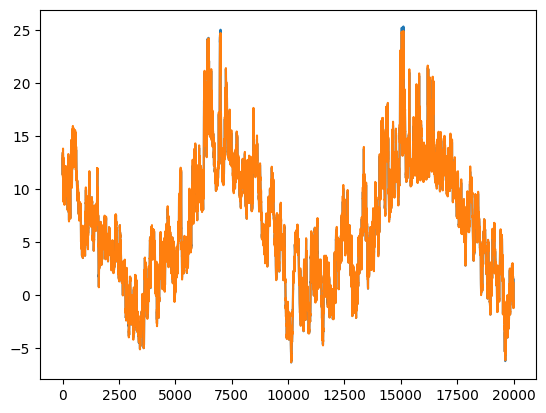

In [ ]:
plt.plot(train_results['Actuals'], label='Actuals')
plt.plot(train_results['Train Predictions'], label='Predictions')

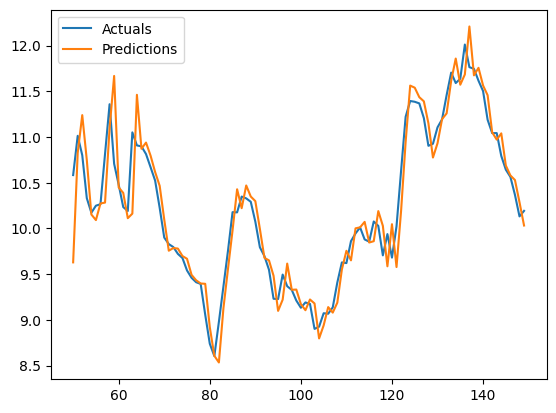

In [ ]:
plt.plot(train_results['Actuals'][50:150], label='Actuals')
plt.plot(train_results['Train Predictions'][50:150], label='Predictions')
plt.legend()

**But we don't really care about how it did on the training, it has seen that data before**

In [ ]:
val_predictions = model.predict(X_valid).flatten()
val_results = pd.DataFrame(data={'Validation Predictions': val_predictions,'Actuals': y_valid}) 
val_results

157/157 [==============================] - 0s 1ms/step


,Validation Predictions,Actuals
0,1.619865,1.556393
1,1.641577,1.682176
2,1.757777,1.245521
3,1.182430,0.851200
4,0.774123,0.605789
...,...,...
4995,4.653154,4.831999
4996,4.874363,5.040882
4997,5.119047,5.038145
4998,5.047042,4.956447


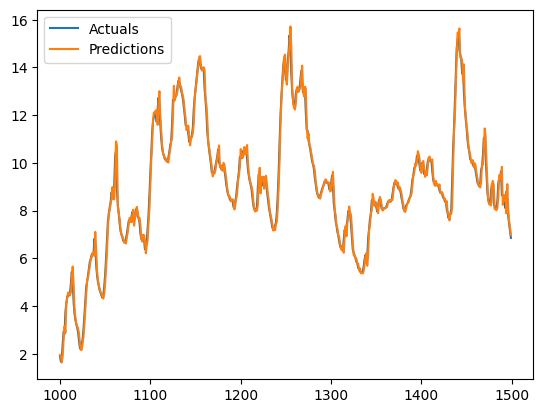

In [ ]:
plt.plot(val_results['Actuals'][1000:1500], label='Actuals')
plt.plot(val_results['Validation Predictions'][1000:1500], label='Predictions')
plt.legend()    